In [1]:
import pandas as pd
df = pd.read_csv("006_crawling_juznevesti.csv")
df

,url,yt_hash,transcript
0,https://www.juznevesti.com/15-minuta/Boban-Sto...,00DtyZ2sCUM,"Gost: Boban Stojanović, redovni profesor Ekono..."
1,https://www.juznevesti.com/15-minuta/Slavoljub...,58xZSVbpgkk,"Gost: Slavoljub Vlajković, narodni poslanik SP..."
2,https://www.juznevesti.com/15-minuta/Zoran-Ziv...,YKAqDCyINz4,"Gost: Zoran Žuvković, predsednik Nove stranke\..."
3,https://www.juznevesti.com/15-minuta/Majkl-Dev...,2QShGnPuVjQ,"Gost: Majkl Devenport, Šef Delegacije EU u Srb..."
4,https://www.juznevesti.com/15-minuta/Jelena-Dj...,khEIELaXKwI,"Gost: Jelena Đorđević, Odbornica u Skupštini g..."
...,...,...,...
295,https://www.juznevesti.com/15-minuta/Dragan-Pe...,a1cN7-Y29_g,"Gost: Dragan Petković, savetnik za evropske in..."
296,https://www.juznevesti.com/15-minuta/Vladica-D...,6CTWDc4amzU,"Gost: Vladica Dimitrov, narodni poslanik SNS i..."
297,https://www.juznevesti.com/15-minuta/Spasoje-M...,IUIKV9XlWEM,"Gost: Spasoje Milovanović, direktor Narodnog p..."
298,https://www.juznevesti.com/15-minuta/Vukosava-...,2-F5yoHSn5k,Gosti: Vukosava Crnjanski i Jovana Đurbabić\n ...


In [6]:
from tqdm.auto import tqdm
import os
import tempfile
from pathlib import Path

audiodir = Path("audio")
def download_sound(yt_hash):
    with tempfile.NamedTemporaryFile() as f:
        cmd = f"youtube-dl {yt_hash} -x --audio-format wav -o {f.name}.wav"
        os.system(cmd)

        cmd = f"ffmpeg -i {f.name}.wav -ac 1 -ar 16000 audio/{yt_hash}.wav"
        os.system(cmd)

from concurrent.futures import ProcessPoolExecutor
with ProcessPoolExecutor(max_workers=4) as executor:
    executor.map(download_sound, df.yt_hash.values)


  0%|          | 0/300 [00:00<?, ?it/s]

[youtube] 00DtyZ2sCUM: Downloading webpage
[download] Destination: /tmp/tmpjbkwvwkg.wav
[download]  13.7% of 15.09MiB at 63.60KiB/s ETA 03:29:37

In [2]:
df["transcript_length"] = df.transcript.apply(len)


<AxesSubplot:ylabel='Frequency'>

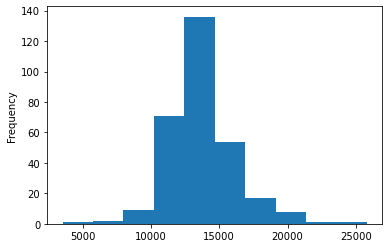

In [3]:
df.transcript_length.plot.hist()

In [4]:
df.transcript.unique().shape

(300,)

In [5]:
df.transcript.str.contains("JV: ").sum()

299